<a href="https://colab.research.google.com/github/ktanguy/normal-dist/blob/main/normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu = 70 # mean of the distribution
std = 10 # standard deviation
sample = 1000 # number of samples

In [ ]:
data = np.random.normal(mu, std, sample)

In [ ]:
def normal_pdf(x, mu, std):
    return 1/(std*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/std)**2)

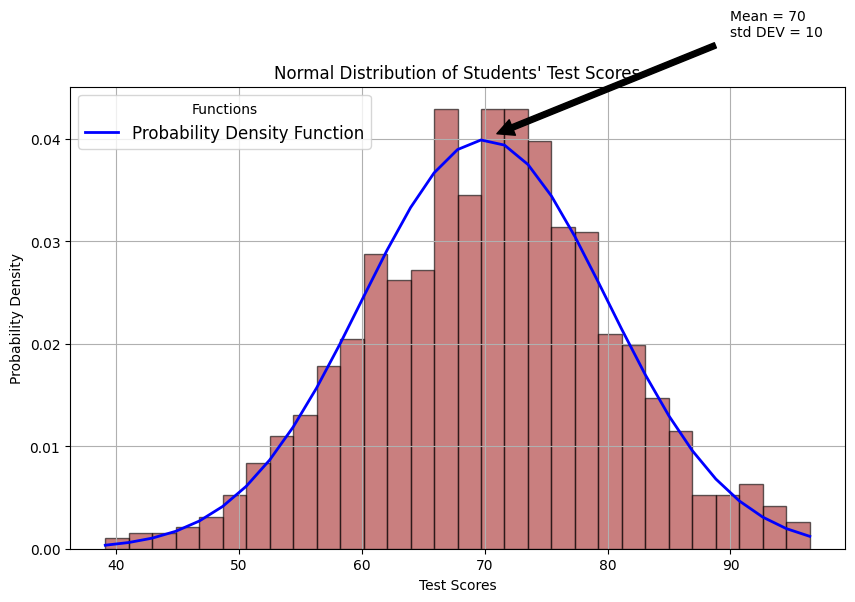

In [ ]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='brown', edgecolor='black')
plt.plot(bins, normal_pdf(bins, mu, std), color='blue', linewidth=2, label='Probability Density Function')
plt.title("Normal Distribution of Students' Test Scores")
plt.xlabel("Test Scores")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend(loc='upper left', fontsize=12, title='Functions')
plt.annotate('Mean = 70\nstd DEV = 10', xy=(mu, 0.04), xytext=(mu+20, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


Gradient Descent using the https://alueducation.instructure.com/courses/1791/assignments/26459 assignment

In [1]:
import numpy as np
from scipy.optimize import minimize

Using scipy to compute Gradient Descent. Using numpy only first to understand how scipy works.

In [2]:
#initial data points
X = np.array([1, 3])
y = np.array([3, 6])

# Initialize parameters
m = -1.0
b = 1.0
alpha = 0.1
max_iters = 100
tolerance = 1e-6

Initializing the list to store the values for visualization

In [3]:
m_vals = []
b_vals = []
cost_vals =[]

Computing the cost function to find the Mean Square Error.

In [4]:
def cost_function(m, b):
  y_pred = m*X + b
  mse = np.mean((y_pred - y)**2)
  return mse

Computing the gradients

In [8]:
def gradients(m, b):
  y_pred = m*X + b
  n = len(X)
  dJ_dm = -2/n * np.sum((y_pred - y)* X)
  dJ_db = -2/n * np.sum((y - y_pred))
  return dJ_dm, dJ_db

Gradient Descent Loop

In [6]:
prev_cost = cost_function(m, b)

For loop for the iterations when computing

In [9]:
for i in range(max_iters):
  dJ_dm, dJ_db = gradients(m, b)
  m = m - alpha * dJ_dm
  b = b - alpha * dJ_db
  m_vals.append(m)
  b_vals.append(b)
  cost = cost_function(m, b)
  cost_vals.append(cost)
  if abs(prev_cost - cost) < tolerance:
        break
  prev_cost = cost

Plotting the iterations to understand convergence

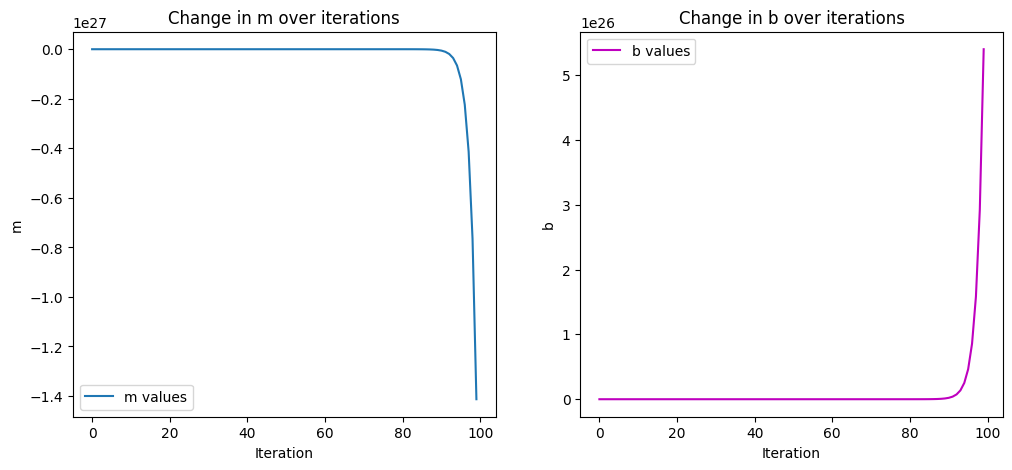

In [13]:
plt.figure(figsize=(12, 5))

# Plot m updates
plt.subplot(1, 2, 1)
plt.plot(m_vals, label="m values")
plt.xlabel("Iteration")
plt.ylabel("m")
plt.title("Change in m over iterations")
plt.legend()

# Plot b updates
plt.subplot(1, 2, 2)
plt.plot(b_vals, label="b values", color='m')
plt.xlabel("Iteration")
plt.ylabel("b")
plt.title("Change in b over iterations")
plt.legend()

plt.show()